In [15]:
import sys
sys.path.insert(0,'../')
import PhlyGreen as pg
import numpy as np
import matplotlib.pyplot as plt

In [16]:
powertrain = pg.Systems.Powertrain.Powertrain(None)
structures = pg.Systems.Structures.Structures(None)
aerodynamics = pg.Systems.Aerodynamics.Aerodynamics(None)
performance = pg.Performance.Performance(None)
mission = pg.Mission.Mission(None)
weight = pg.Weight.Weight(None)
constraint = pg.Constraint.Constraint(None)
welltowake = pg.WellToWake.WellToWake(None)

myaircraft = pg.Aircraft(powertrain, structures, aerodynamics, performance, mission, weight, constraint, welltowake)

powertrain.aircraft = myaircraft
structures.aircraft = myaircraft
aerodynamics.aircraft = myaircraft
mission.aircraft = myaircraft
performance.aircraft = myaircraft
weight.aircraft = myaircraft
constraint.aircraft = myaircraft
welltowake.aircraft = myaircraft

In [17]:
ConstraintsInput = {'Cruise': {'Speed': 115, 'Speed Type':'TAS', 'Beta': 1., 'Altitude': 3000.},
         'AEO Climb': {'Speed': 1.2*34.5, 'Speed Type':'TAS', 'Beta': 1., 'Altitude': 0., 'ROC': 8},
         'OEI Climb': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta':1., 'Altitude': 0., 'Climb Gradient': 0.021},
         'Take Off': {'Speed': 1.2*34.5, 'Speed Type': 'TAS', 'Beta': 1., 'Altitude': 0., 'kTO': 1.2, 'sTO': 793},
         'Landing':{'Speed': 34.6, 'Speed Type': 'TAS', 'Altitude': 0.},
         'Turn':{'Speed': 150, 'Speed Type': 'KCAS', 'Beta': 0.9, 'Altitude': 3000, 'Load Factor': 1.1},
         'Ceiling':{'Speed': 0.2, 'Beta': 0.8, 'Altitude': 5000, 'HT': 0.5},
         'Acceleration':{'Mach 1': 0.2, 'Mach 2':0.3, 'DT': 180, 'Altitude': 3000, 'Beta': 0.9},
         'DISA': 0}

MissionInput = {'Range Mission': 214,  #nautical miles
                'Range Diversion': 146,  #nautical miles
                # 'Range Loiter': 50,
                'Time Loiter': 30, #Minutes
                'Beta start': 0.97,
                'Payload Weight': 1960,  #Kg
                'Crew Weight': 0}  #Kg

MissionStages = {'Takeoff': {'Supplied Power Ratio':{'phi': 0.0}},
                'Climb1': {'type': 'OptimumClimb', 'input': {'CB':0.08, 'Speed': 1.2*34.5, 'StartAltitude': 0, 'EndAltitude': 1500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Climb2': {'type': 'OptimumClimb', 'input': {'CB':0.08, 'Speed': 1.2*34.5, 'StartAltitude': 1500, 'EndAltitude': 3000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Cruise': {'type': 'DiscretizedCruise', 'input':{ 'Mach': 0.35, 'Altitude': 3000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                'Descent1': {'type': 'OptimumDescent', 'input':{'CB': -0.08, 'Speed': 1.2*34.5, 'StartAltitude': 3000, 'EndAltitude': 0}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

DiversionStages = {'Climb1': {'type': 'OptimumClimb', 'input': {'CB': 0.08, 'Speed': 1.2*34.5, 'StartAltitude': 0, 'EndAltitude': 1000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }},
                 'Cruise': {'type': 'DiscretizedCruise', 'input':{ 'Mach': 0.25, 'Altitude': 1000}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0}},
                 'Descent1': {'type': 'OptimumDescent', 'input':{'CB': -0.08, 'Speed': 1.2*34.5, 'StartAltitude': 1000, 'EndAltitude': 500}, 'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}}

LoiterStages = {'Cruise': {'type': 'DiscretizedCruise', 'input': {'Mach': 0.16, 'Altitude': 500},  'Supplied Power Ratio':{'phi_start': 0.0, 'phi_end':0.0 }}} 

EnergyInput = {'Ef': 42.8*10**6,
                   'Contingency Fuel': 0,
                   'Ebat': 700 * 3600,
                   'pbat': 1000,
                   'Eta Gas Turbine': 0.21,
                   'Eta Gearbox': 1,
                   'Eta Propulsive': 0.8,
                   'Eta Electric Motor 1': 0.96,    #for serial config
                   'Eta Electric Motor 2': 0.96,    #for serial config
                   'Eta Electric Motor': 0.98,      #for parallel config
                   'Eta PMAD': 0.99,
                   'Specific Power Powertrain': [3310,7700],
                   'Specific Power PMAD': [2200,2200,2200],
                   'PowertoWeight Battery': 35, 
                   'PowertoWeight Powertrain': [150,33],
                   'PowertoWeight PMAD': 0
                   }

AerodynamicsInput = {'AnalyticPolar': {'type': 'Quadratic', 'input': {'AR': 9, 'e_osw': 0.63}},
                     'Take Off Cl': 1.34,
                     'Landing Cl': 2.67,
                     'Minimum Cl': 0.17,
                     'Cd0': 0.029}

In [18]:
myaircraft.ConstraintsInput = ConstraintsInput
myaircraft.AerodynamicsInput = AerodynamicsInput
myaircraft.MissionInput = MissionInput
myaircraft.MissionStages = MissionStages
myaircraft.DiversionStages = DiversionStages
myaircraft.LoiterStages = LoiterStages
myaircraft.EnergyInput = EnergyInput

myaircraft.Configuration = 'Hybrid'
myaircraft.HybridType = 'Parallel'
myaircraft.AircraftType = 'DO228'

In [19]:
# Initialize Constraint Analysis
myaircraft.constraint.SetInput()

# Initialize Aerodynamics subsystem
myaircraft.aerodynamics.SetInput()

myaircraft.constraint.FindDesignPoint()
print('----------------------------------------')
print('Design W/S: ', myaircraft.DesignWTOoS)
print('Design P/W: ', myaircraft.DesignPW)
print('----------------------------------------')

# Initialize Mission profile and Analysis
myaircraft.mission.InitializeProfile()
myaircraft.mission.SetInput()



# Initialize Powertrain
myaircraft.powertrain.SetInput()

# Initialize Weight Estimator
myaircraft.weight.SetInput()



----------------------------------------
Design W/S:  1955.6756756756756
Design P/W:  151.35292344762394
----------------------------------------
500
357.1012067685637
688.5554183241984
688.5554183241354


In [20]:

myaircraft.weight.WeightEstimation()
myaircraft.WingSurface = myaircraft.weight.WTO / myaircraft.DesignWTOoS * 9.81

print('Fuel mass (trip + altn + loiter) [Kg]: ', myaircraft.weight.Wf)
print('Block Fuel mass [Kg]:         ', myaircraft.weight.Wf + myaircraft.weight.final_reserve)
print('Structure [Kg]:               ', myaircraft.weight.WStructure)
print('Powertrain mass [Kg]:         ',myaircraft.weight.WPT)
print('Empty Weight [Kg]:            ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew)
print('Zero Fuel Weight [Kg]:        ', myaircraft.weight.WPT + myaircraft.weight.WStructure + myaircraft.weight.WCrew  + myaircraft.weight.WPayload)
print('----------------------------------------')
print('Takeoff Weight: ', myaircraft.weight.WTO)
if myaircraft.WellToTankInput is not None:
    print('Source Energy: ', myaircraft.welltowake.SourceEnergy/1.e6,' MJ')
    print('Psi: ', myaircraft.welltowake.Psi)
print('Wing Surface: ', myaircraft.WingSurface, ' m^2')
print('TakeOff engine shaft peak power [kW]:      ', myaircraft.mission.TO_PP/1000.)
print('Climb/cruise engine shaft peak power [kW]: ', myaircraft.mission.Max_PEng/1000.)
print('Sizing phase for thermal powertrain ', 'Climb/Cruise peak power' if myaircraft.mission.Max_PEng > myaircraft.mission.TO_PP else 'Takeoff peak power'  )


Fuel mass (trip + altn + loiter) [Kg]:  548.8989329571945
Block Fuel mass [Kg]:          571.1242056442185
Structure [Kg]:                3364.974669538322
Powertrain mass [Kg]:          278.16657351162775
Empty Weight [Kg]:             3643.1412430499495
Zero Fuel Weight [Kg]:         5603.1412430499495
----------------------------------------
Takeoff Weight:  6174.265448694168
Wing Surface:  30.971159893760678  m^2
TakeOff engine shaft peak power [kW]:       691.131846737751
Climb/cruise engine shaft peak power [kW]:  920.7313583234878
Sizing phase for thermal powertrain  Climb/Cruise peak power


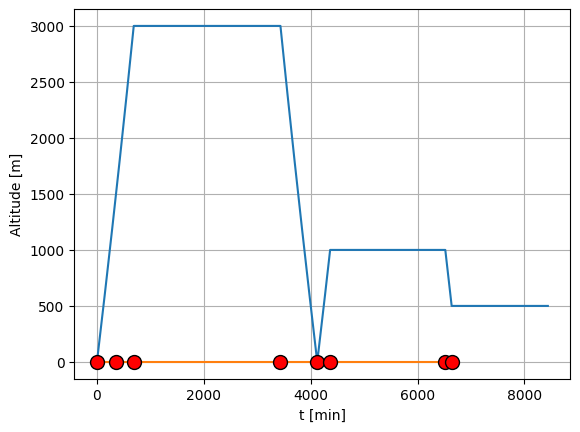

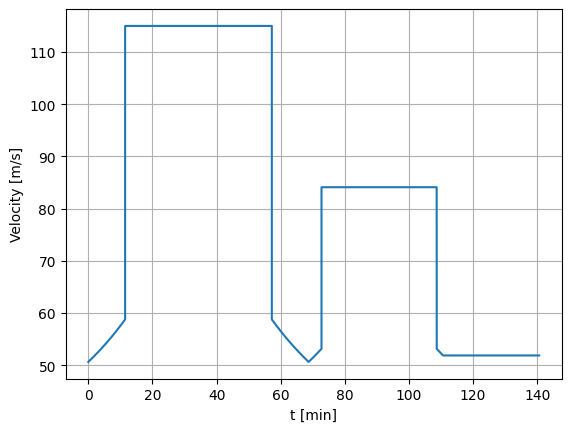

In [21]:
plt.plot(myaircraft.mission.profile.DiscretizedTime,myaircraft.mission.profile.DiscretizedAltitudes)
plt.plot(myaircraft.mission.profile.Breaks, np.ones(len(myaircraft.mission.profile.Breaks)), marker='o', markersize = 10, markerfacecolor = 'red', markeredgecolor = 'black')
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Altitude [m]')
plt.show()

plt.plot(myaircraft.mission.profile.DiscretizedTime/60,myaircraft.mission.profile.DiscretizedVelocities)
plt.grid(visible=True)
plt.xlabel('t [min]')
plt.ylabel('Velocity [m/s]')
plt.show()